# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

- This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

    - ‘ScheduledDay’ tells us on what day the patient set up their appointment.
    - ‘Neighborhood’ indicates the location of the hospital.
    - ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    - 'No-show' indicates No if shown and Yes if they didn't show up
    - 'Hipertension' indicates 0 for no and 1 for yes
    - 'Diabetes' indicates 0 for no diabetes and 1 if they have diabetes
    - 'Alcoholism' indicates 0 if they never take any alcohols and 1 if they have a history
    - 'Handicap' indicates 0 if they are not and 1 if they are handicaps
    - 'ScheduledDay' and 'AppointmentDay' related to the day of scheduling or appointment are they far from each other?

### Question(s) for Analysis

- What is the proportion of people that didn't come?
- Is there a relation between not showing up and if they received SMS?
- Is there a relation between not showing up and if they were included in scholarship?
- Is there a relation between not showing up and if they were Handicapped?
- Is there a relation between not showing up and if they had an related history to alcohol?
- Is there a relation between not showing up and if they had a Diabetes?
- Is there a relation between not showing up and if they had a Hipertension?
- Which neighbourhood had received most people ?
- Is there a relation between not showing up and Age?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
# Upgrade pandas 
!pip install --upgrade pandas==1.3.2

Requirement already up-to-date: pandas==1.3.2 in c:\users\peter\anaconda3\lib\site-packages (1.3.2)


<a id='wrangling'></a>
## Data Wrangling



### Gathering,Importing, Assessing and Cleaning Data Set

In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
df.tail(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


As we can see there's a columns we can drop like PatientId, AppointmentID. There's a cases we might not need to drop those columns. That's when we want to identify which Patient or which ID that hasn't shown "Maybe there's a death or something"

We will check unique values, null values, duplicated values first, datatypes, datashape and of course description

In [5]:
df.shape

(110527, 14)

In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
# by repeating this code we get the following
type(df['No-show'][0])

str

The dtypes we get

 -  2    Gender          110527 non-null  object (String)
 
 -  3   ScheduledDay    110527 non-null  object (String)
 
 -  4   AppointmentDay  110527 non-null  object (String)
 
 -  6   Neighbourhood   110527 non-null  object (String)
 
 - 13  No-show         110527 non-null  object  (String)


### Data Cleaning
 

## Copy Dataframe

In [12]:
# Before droping let's make a copy of our dataframe that's a safest option
df_1 = df.copy()

## Drop ID columns

In [13]:
df_1.drop(['PatientId','AppointmentID'], axis = 1, inplace = True)
df_1.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df_1.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


## Checking Value Counts for each Column

In [15]:
df_1['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [16]:
df_1['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

## Outlier Detection

**Whoaaa!!** outliers detected

We will drop the value of Age = -1 and we will count the ages that greater Than 102 and drop this value

0 and 1 are for children that are newly born so we will keep both

In [17]:
filt_1 = df_1.query('Age >= 102')
filt_2 = df_1.query('Age < 0')

In [18]:
filt_1

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [19]:
filt_2

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Drop Ages that are greater than or equal 102 and less than 0

In [20]:
df_1.drop(df_1[df_1['Age'] >= 102].index, inplace = True)

In [21]:
df_1.drop(df_1[df_1['Age'] < 0].index, inplace = True)

In [22]:
df_1[df_1['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [23]:
df_1[df_1['Age'] >= 102]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [24]:
df_1.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040
std,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110519 non-null  object
 1   ScheduledDay    110519 non-null  object
 2   AppointmentDay  110519 non-null  object
 3   Age             110519 non-null  int64 
 4   Neighbourhood   110519 non-null  object
 5   Scholarship     110519 non-null  int64 
 6   Hipertension    110519 non-null  int64 
 7   Diabetes        110519 non-null  int64 
 8   Alcoholism      110519 non-null  int64 
 9   Handcap         110519 non-null  int64 
 10  SMS_received    110519 non-null  int64 
 11  No-show         110519 non-null  object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


In [26]:
df_1['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [27]:
df_1['No-show'].value_counts()

No     88203
Yes    22316
Name: No-show, dtype: int64

## Q0: What is the proportion of people that didn't come?

In [28]:
## getting the yes values
df_y = df_1[df_1['No-show'] == 'Yes']
df_y

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
110484,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110492,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110515,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


proportion of the people that not shown is equal **Yes** [22316 rows]/ **all** [110519 all dataframe]

In [29]:
proportion = 22316 / 110519
proportion

0.2019200318497272

There's 20,2% of people not shown. That means from 100 people there's a posibility that 20 people won't come

In [30]:
df_1['Scholarship'].value_counts()

0    99658
1    10861
Name: Scholarship, dtype: int64

In [31]:
df_1['Hipertension'].value_counts()

0    88719
1    21800
Name: Hipertension, dtype: int64

In [32]:
df_1['Diabetes'].value_counts()

0    102576
1      7943
Name: Diabetes, dtype: int64

In [33]:
df_1['Alcoholism'].value_counts()

0    107159
1      3360
Name: Alcoholism, dtype: int64

In [34]:
df_1['Handcap'].value_counts()

0    108282
1      2038
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [35]:
df_1['SMS_received'].value_counts(normalize = True)

0    0.67896
1    0.32104
Name: SMS_received, dtype: float64

In [36]:
for i, v in enumerate(df_1.columns):
    print(i, v)

0 Gender
1 ScheduledDay
2 AppointmentDay
3 Age
4 Neighbourhood
5 Scholarship
6 Hipertension
7 Diabetes
8 Alcoholism
9 Handcap
10 SMS_received
11 No-show


In [37]:
round(df_1['Age'].mean())

37

In [38]:
df_1['ScheduledDay'] = pd.to_datetime(df_1['ScheduledDay'])
df_1['AppointmentDay'] = pd.to_datetime(df_1['AppointmentDay'])


In [39]:
df_1.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

<a id='eda'></a>
## Exploratory Data Analysis

Exploring with visuals, Drawing conclusions and communicating results

### Q0.2: How many of them has shown(plotting)

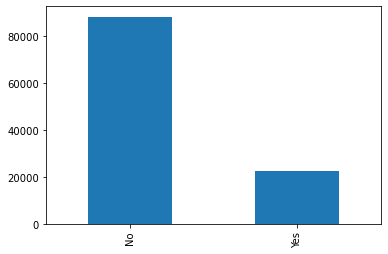

In [40]:
df_1['No-show'].value_counts().plot(kind = 'bar');

We will see the correlation between values of our dataframe

[Text(0.5, 1.0, 'people not shown comparison')]

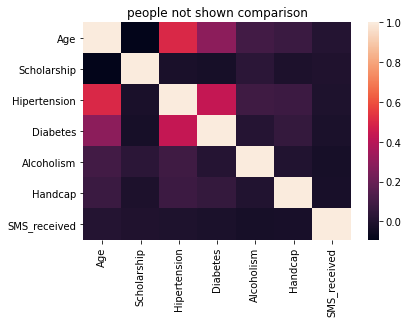

In [49]:
p = sns.heatmap(df_1.corr());
p.set(title = "Comparison of different variables")

There's a fairly high correlation ( > 0.6) between Hipertension and Age

- From our histograms There's a lot of people Scheduled Day between 2 months That are May 2016 and June 2016

- Appointment Day that has most people was at 1st of june and 4th of june 2016 

- The highest ages was between 0 and 10 Years old

- nearly 10k of patients has Scholarship

- more than 20k have hipertensions

- nearly 5k of people have diabetes

- nearly 3k are Alcoholism

- nearly 1-2k are handcap

- From 30k - 38k of people has received messages either they confirming the Scheduling or  the Appointment Day

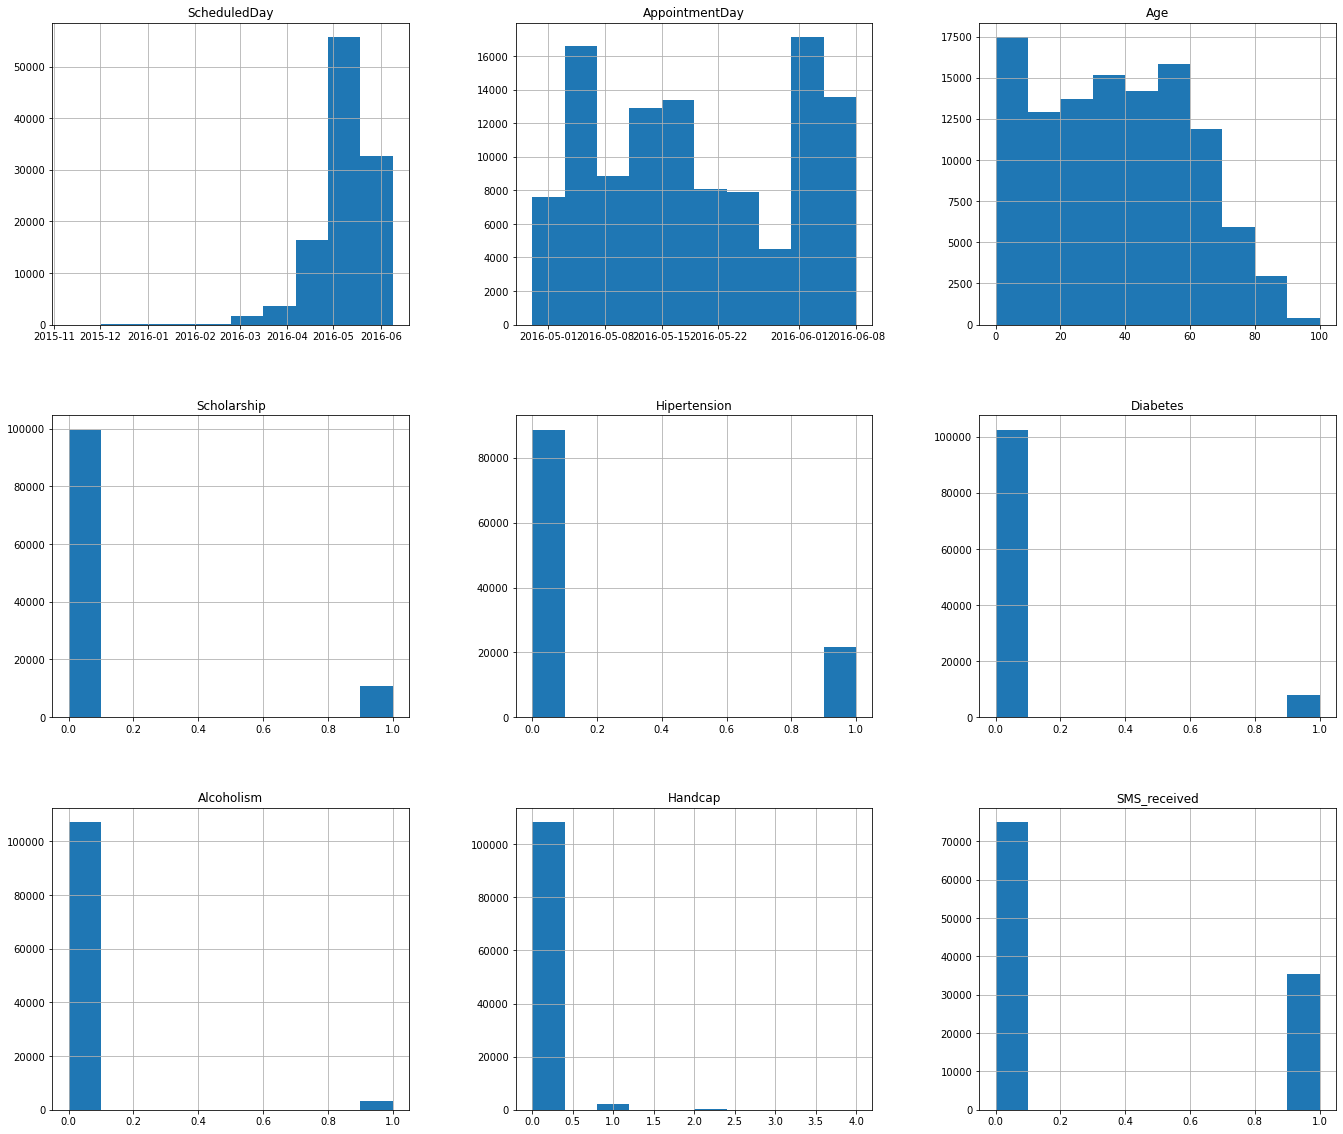

In [42]:
df_1.hist(figsize=(23, 20));

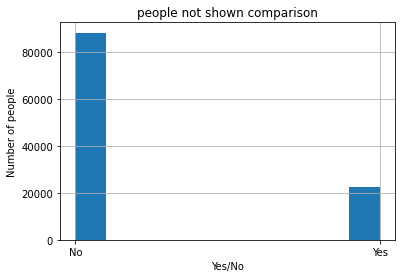

In [45]:
df_1['No-show'].hist();
plt.title("people not shown comparison")
plt.xlabel("Yes/No")
plt.ylabel("Number of people")
plt.show()

In [50]:
df_1.sort_values(by=['AppointmentDay'],inplace=True)

In [51]:
df_1.sort_values(by=['ScheduledDay'],inplace=False)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3764,F,2015-11-10 07:13:56+00:00,2016-05-04 00:00:00+00:00,51,RESISTÊNCIA,0,0,0,0,0,1,No
46292,M,2015-12-03 08:17:28+00:00,2016-05-02 00:00:00+00:00,34,VILA RUBIM,0,1,0,0,0,1,Yes
102795,F,2015-12-07 10:40:59+00:00,2016-06-03 00:00:00+00:00,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,Yes
102797,F,2015-12-07 10:42:42+00:00,2016-06-03 00:00:00+00:00,48,MARUÍPE,0,1,1,0,0,1,No
102796,F,2015-12-07 10:43:01+00:00,2016-06-03 00:00:00+00:00,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...
92442,M,2016-06-08 19:32:25+00:00,2016-06-08 00:00:00+00:00,54,JARDIM CAMBURI,0,0,0,0,0,0,No
88146,F,2016-06-08 19:32:56+00:00,2016-06-08 00:00:00+00:00,43,JARDIM CAMBURI,0,0,0,0,0,0,No
88147,M,2016-06-08 19:33:23+00:00,2016-06-08 00:00:00+00:00,27,JARDIM CAMBURI,0,0,0,0,0,0,No
87219,F,2016-06-08 19:58:52+00:00,2016-06-08 00:00:00+00:00,30,JARDIM CAMBURI,0,0,0,0,0,0,No


As we can see we can seperate values of Columns Appointment Day and Scheduled Day to dates and times. we can seperate them into columns have dates only and drop the old one, we will be also renaming our columns

In [52]:
# ScheduledDay 	AppointmentDay
df_1['scheduledday'] = pd.to_datetime(df['ScheduledDay']).dt.date
# df_1['scheduledtime'] = pd.to_datetime(df['ScheduledDay']).dt.time
df_1['appointmentday'] = pd.to_datetime(df['AppointmentDay']).dt.date
# df_1['appointmenttime'] = pd.to_datetime(df['AppointmentDay']).dt.time
df_1.drop(['ScheduledDay','AppointmentDay'] ,axis=1, inplace =True)

In [53]:
df_1.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduledday,appointmentday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
2151,M,33,MARIA ORTIZ,0,0,0,0,0,1,No,2016-03-29,2016-04-29
2152,F,50,MARIA ORTIZ,0,0,0,0,0,0,No,2016-03-29,2016-04-29
2153,F,69,MARIA ORTIZ,0,0,0,0,0,1,No,2016-03-29,2016-04-29
2154,F,65,MARIA ORTIZ,0,0,0,0,0,0,No,2016-04-29,2016-04-29


In [54]:
df_1.tail()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduledday,appointmentday
92055,M,24,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-08,2016-06-08
99217,F,54,JESUS DE NAZARETH,0,1,0,0,0,0,No,2016-06-06,2016-06-08
99218,F,50,SANTA MARTHA,0,1,0,0,0,0,No,2016-06-06,2016-06-08
99224,F,64,SANTA TEREZA,0,1,1,0,0,0,No,2016-06-06,2016-06-08
91900,M,14,TABUAZEIRO,0,0,0,0,0,1,Yes,2016-05-25,2016-06-08


We will seperate the Dataframe into 2 one containing females only and one contains male only

In [55]:
df_fem = df_1[df_1["Gender"] == "F"]
df_fem

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduledday,appointmentday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
2152,F,50,MARIA ORTIZ,0,0,0,0,0,0,No,2016-03-29,2016-04-29
2153,F,69,MARIA ORTIZ,0,0,0,0,0,1,No,2016-03-29,2016-04-29
2154,F,65,MARIA ORTIZ,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2155,F,25,MARIA ORTIZ,0,0,0,0,0,1,Yes,2016-03-29,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...
99207,F,38,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-06,2016-06-08
92057,F,48,JABOUR,0,0,0,0,0,0,No,2016-06-08,2016-06-08
99217,F,54,JESUS DE NAZARETH,0,1,0,0,0,0,No,2016-06-06,2016-06-08
99218,F,50,SANTA MARTHA,0,1,0,0,0,0,No,2016-06-06,2016-06-08


In [56]:
df_fem.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,71832.000000,71832.000000,71832.000000,71832.000000,71832.000000,71832.000000,71832.000000
mean,38.887487,0.123246,0.213526,0.078043,0.017026,0.019490,0.336911
std,22.144363,0.328722,0.409799,0.268241,0.129368,0.149838,0.472658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [57]:
df_ma = df_1[df_1["Gender"] == "M"]
df_ma

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduledday,appointmentday
2151,M,33,MARIA ORTIZ,0,0,0,0,0,1,No,2016-03-29,2016-04-29
2158,M,61,ANDORINHAS,0,0,0,0,0,1,No,2016-03-29,2016-04-29
2162,M,23,MARIA ORTIZ,0,0,0,0,0,1,No,2016-03-29,2016-04-29
2163,M,41,MARIA ORTIZ,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2166,M,65,SÃO JOSÉ,0,1,1,1,0,0,No,2016-04-29,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...
99208,M,51,SANTO ANDRÉ,0,0,0,0,0,0,Yes,2016-06-06,2016-06-08
99212,M,22,CENTRO,0,0,0,0,0,0,No,2016-06-06,2016-06-08
99213,M,58,JABOUR,0,0,0,0,0,0,Yes,2016-06-06,2016-06-08
92055,M,24,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-08,2016-06-08


In [58]:
df_ma.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000
mean,33.736863,0.051904,0.167033,0.060408,0.055238,0.027270,0.291571
std,24.435221,0.221836,0.373010,0.238244,0.228448,0.180917,0.454492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Q1 : Is there a relation between not showing up and if they received SMS?

In [59]:
df_1.groupby(['Gender', 'No-show']).mean().SMS_received

Gender  No-show
F       No         0.305393
        Yes        0.460558
M       No         0.265358
        Yes        0.396634
Name: SMS_received, dtype: float64

As we can see 30% of sent messages to females has shown while 46% not shown and for Males 26.5% of total patients has shown while 39.66% hasn't shown

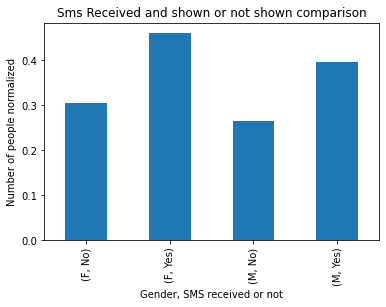

In [61]:
df_1.groupby(['Gender', 'No-show']).mean().SMS_received.plot(kind = "bar");
plt.title("Sms Received and shown or not shown comparison")
plt.xlabel("Gender, SMS received or not")
plt.ylabel("Number of people normalized")
plt.show()

## Q2 : Is there a relation between not showing up and if they were included in scholarship?

In [62]:
df_1.groupby(['Gender', 'No-show']).mean().Scholarship

Gender  No-show
F       No         0.117870
        Yes        0.144336
M       No         0.049609
        Yes        0.061100
Name: Scholarship, dtype: float64

From the values we have seen that most of Females and males although they have scholarships they didn't appear

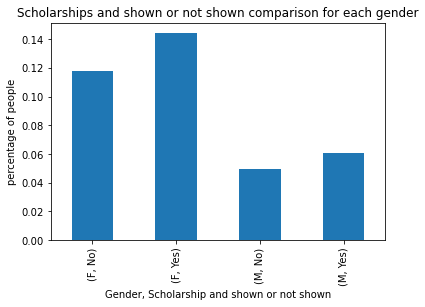

In [64]:
df_1.groupby(['Gender', 'No-show']).mean().Scholarship.plot(kind = "bar");
plt.title("Scholarships and shown or not shown comparison for each gender")
plt.xlabel("Gender, Scholarship and shown or not shown")
plt.ylabel("percentage of people")
plt.show()

## Q3 : Is there a relation between not showing up and if they were Handicapped?

In [65]:
df_1.groupby(['Gender', 'No-show']).mean().Handcap

Gender  No-show
F       No         0.019776
        Yes        0.018367
M       No         0.028196
        Yes        0.023560
Name: Handcap, dtype: float64

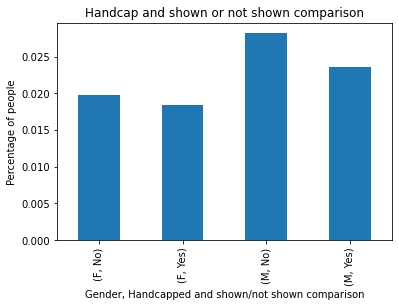

In [66]:
df_1.groupby(['Gender', 'No-show']).mean().Handcap.plot(kind = "bar");
plt.title("Handcap and shown or not shown comparison")
plt.xlabel("Gender, Handcapped and shown/not shown comparison")
plt.ylabel("Percentage of people")
plt.show()

## Q4 : Is there a relation between not showing up and if they had an related history to alcohol?

In [67]:
df_1.groupby(['Gender', 'No-show']).mean().Alcoholism

Gender  No-show
F       No         0.015985
        Yes        0.021109
M       No         0.057102
        Yes        0.047767
Name: Alcoholism, dtype: float64

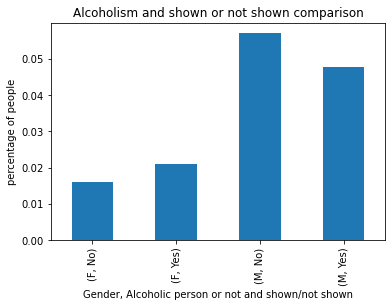

In [68]:
df_1.groupby(['Gender', 'No-show']).mean().Alcoholism.plot(kind = "bar");
plt.title("Alcoholism and shown or not shown comparison")
plt.xlabel("Gender, Alcoholic person or not and shown/not shown")
plt.ylabel("percentage of people")
plt.show()

## Q5 : Is there a relation between not showing up and if they had a Diabetes?

In [69]:
df_1.groupby(['Gender', 'No-show']).mean().Diabetes

Gender  No-show
F       No         0.080170
        Yes        0.069701
M       No         0.062141
        Yes        0.053463
Name: Diabetes, dtype: float64

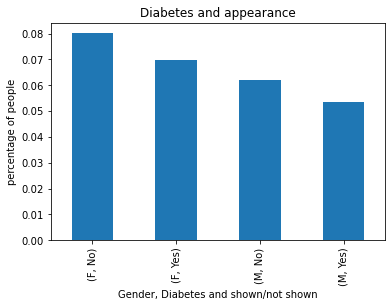

In [70]:
df_1.groupby(['Gender', 'No-show']).mean().Diabetes.plot(kind = "bar");
plt.title("Diabetes and appearance")
plt.xlabel("Gender, Diabetes and shown/not shown")
plt.ylabel("percentage of people")
plt.show()

## Q6 : Is there a relation between not showing up and if they had a Hipertension?

In [71]:
df_1.groupby(['Gender', 'No-show']).mean().Hipertension

Gender  No-show
F       No         0.221537
        Yes        0.182099
M       No         0.172696
        Yes        0.144337
Name: Hipertension, dtype: float64

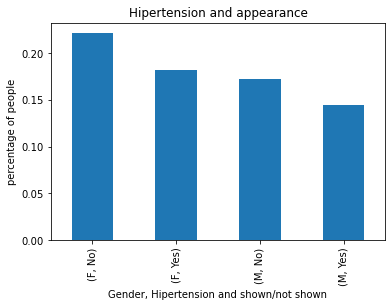

In [72]:
df_1.groupby(['Gender', 'No-show']).mean().Hipertension.plot(kind = "bar");
plt.title("Hipertension and appearance")
plt.xlabel("Gender, Hipertension and shown/not shown")
plt.ylabel("percentage of people")
plt.show()

### Renaming some columns

In [73]:
df_1.rename(columns = {'No-show':'noshow', 'SMS_received':'smsreceived'}, inplace = True)

In [74]:
df_1.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,smsreceived,noshow,scheduledday,appointmentday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29


In [75]:
di = {'Yes': 0, 'No': 1}
df_1.replace({"noshow": di})

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,smsreceived,noshow,scheduledday,appointmentday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,2016-04-29
2151,M,33,MARIA ORTIZ,0,0,0,0,0,1,1,2016-03-29,2016-04-29
2152,F,50,MARIA ORTIZ,0,0,0,0,0,0,1,2016-03-29,2016-04-29
2153,F,69,MARIA ORTIZ,0,0,0,0,0,1,1,2016-03-29,2016-04-29
2154,F,65,MARIA ORTIZ,0,0,0,0,0,0,1,2016-04-29,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...
92055,M,24,MARIA ORTIZ,0,0,0,0,0,0,1,2016-06-08,2016-06-08
99217,F,54,JESUS DE NAZARETH,0,1,0,0,0,0,1,2016-06-06,2016-06-08
99218,F,50,SANTA MARTHA,0,1,0,0,0,0,1,2016-06-06,2016-06-08
99224,F,64,SANTA TEREZA,0,1,1,0,0,0,1,2016-06-06,2016-06-08


## Q7 : Which neighbourhood had received most people ?

In [76]:
df_1['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [77]:
df_1['Neighbourhood'].value_counts(normalize = True)

JARDIM CAMBURI                 0.069825
MARIA ORTIZ                    0.052516
RESISTÊNCIA                    0.040093
JARDIM DA PENHA                0.035080
ITARARÉ                        0.031795
                                 ...   
ILHA DO BOI                    0.000317
ILHA DO FRADE                  0.000090
AEROPORTO                      0.000072
ILHAS OCEÂNICAS DE TRINDADE    0.000018
PARQUE INDUSTRIAL              0.000009
Name: Neighbourhood, Length: 81, dtype: float64

## Q8: Is there a relation between not showing up and Age?

In [78]:
df_1.groupby(['Gender', 'noshow']).mean().Age

Gender  noshow
F       No        39.586311
        Yes       36.145980
M       No        34.461372
        Yes       30.833010
Name: Age, dtype: float64

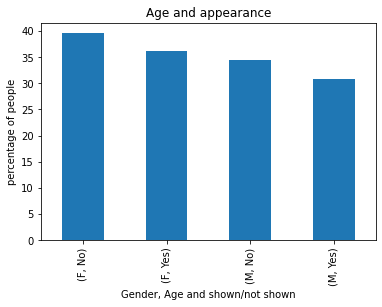

In [79]:
df_1.groupby(['Gender', 'noshow']).mean().Age.plot(kind = "bar");
plt.title("Age and appearance")
plt.xlabel("Gender, Age and shown/not shown")
plt.ylabel("percentage of people")
plt.show()

In [80]:
df_1.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,smsreceived
count,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040
std,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [81]:
df_ma.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000
mean,33.736863,0.051904,0.167033,0.060408,0.055238,0.027270,0.291571
std,24.435221,0.221836,0.373010,0.238244,0.228448,0.180917,0.454492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [82]:
df_1.shape

(110519, 12)

## Conclusions

- From our histograms There's a lot of people Scheduled Day between 2 months That are May 2016 and June 2016

- Appointment Day that has most people was at 1st of june and 4th of june 2016 

- The highest ages was between 0 and 10 Years old

- nearly 10k of patients has Scholarship

- more than 20k have hipertensions

- nearly 5k of people have diabetes

- nearly 3k are Alcoholism

- nearly 1-2k are handcap

- From 30k - 38k of people has received messages either they confirming the Scheduling or  the Appointment Day

- There's 20,2% of people not shown. That means from 100 people there's a posibility that 20 people won't come

- We had to remove outliers like Age == -1 or Ages > 100

- There's 20,2% of people noshown

- Mean Age is 37 yo, 25% of Ages is 18 Yo, 50% are 37 Yo and 57% is 55 Yo

- For males we can see that mean value of Age 34 Yo 25% are 10 Yo, 50% are 33 Yo and 75% are 54 Yo.

- Mean of males that received SMS is 29%


| Gender  | No-show    | SMS_received
| :---    |:---        | :---
| F       | No         | 0.305393
| F       | Yes        | 0.460558
| M       | No         | 0.265358
| M       | Yes        | 0.396634


- As we can see 30% of sent messages to females has shown while 46% not shown and for Males 26.5% of total patients has shown while 39.66% hasn't shown

| Gender  | No-show    | Scholarship(mean)
| :---    |:---        | :---
| F       | No         | 0.117870
| F       | Yes        | 0.144336
| M       | No         | 0.049609
| M       | Yes        | 0.061100


| Gender  | No-show    | Age(mean)
| :-------|:-----------| :-------------
| F       | No         | 39.586311
| F       | Yes        | 36.145980
| M       | No         | 34.461372
| M       | Yes        | 30.833010

As we can see **14%** of **Females** that have scholarships not appeared at appointment Day and There's **6%** of **men** that has Scholarships(enrolled in Brasilian welfare program Bolsa Família) not appeared at appointment Day so We are pretty sure that having scholarship has strong impact on the appearance of patient.Our final shape of our data is there's 110519 rows (values"outliers removed") and 12 columns we removed The first 3 columns (PatientID, Appointment ID) We may need them if we were searching for a specific ID but here we don't want specific IDs we just want to do some Analysis!!!

[Here's a link to a mark down File extended Syntax review](https://www.markdownguide.org/extended-syntax/)

Also I should mention [Stackoverflow](stackoverflow.com/),[geeks for geeks](www.geeksforgeeks.org) and of course [github](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#links) as they helped me alot to remember some syntax besides did some rememorize from course lessons


### Limitation:-

- we may needed to divide dataframe by neighbourhoods and do some further analysis but we couldn't as there's a length of 81 value and it will take much longer time.

- There's also a needed data to specify which Sms-Message type is sent "Is it confirmation or a reminder?"


### Finally

- Maybe we can Predict which one will show and who won't but further data is needed

In [83]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'No-show appointments.ipynb'])

1